In [19]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log,sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
sc_x = StandardScaler()
X,y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=8)

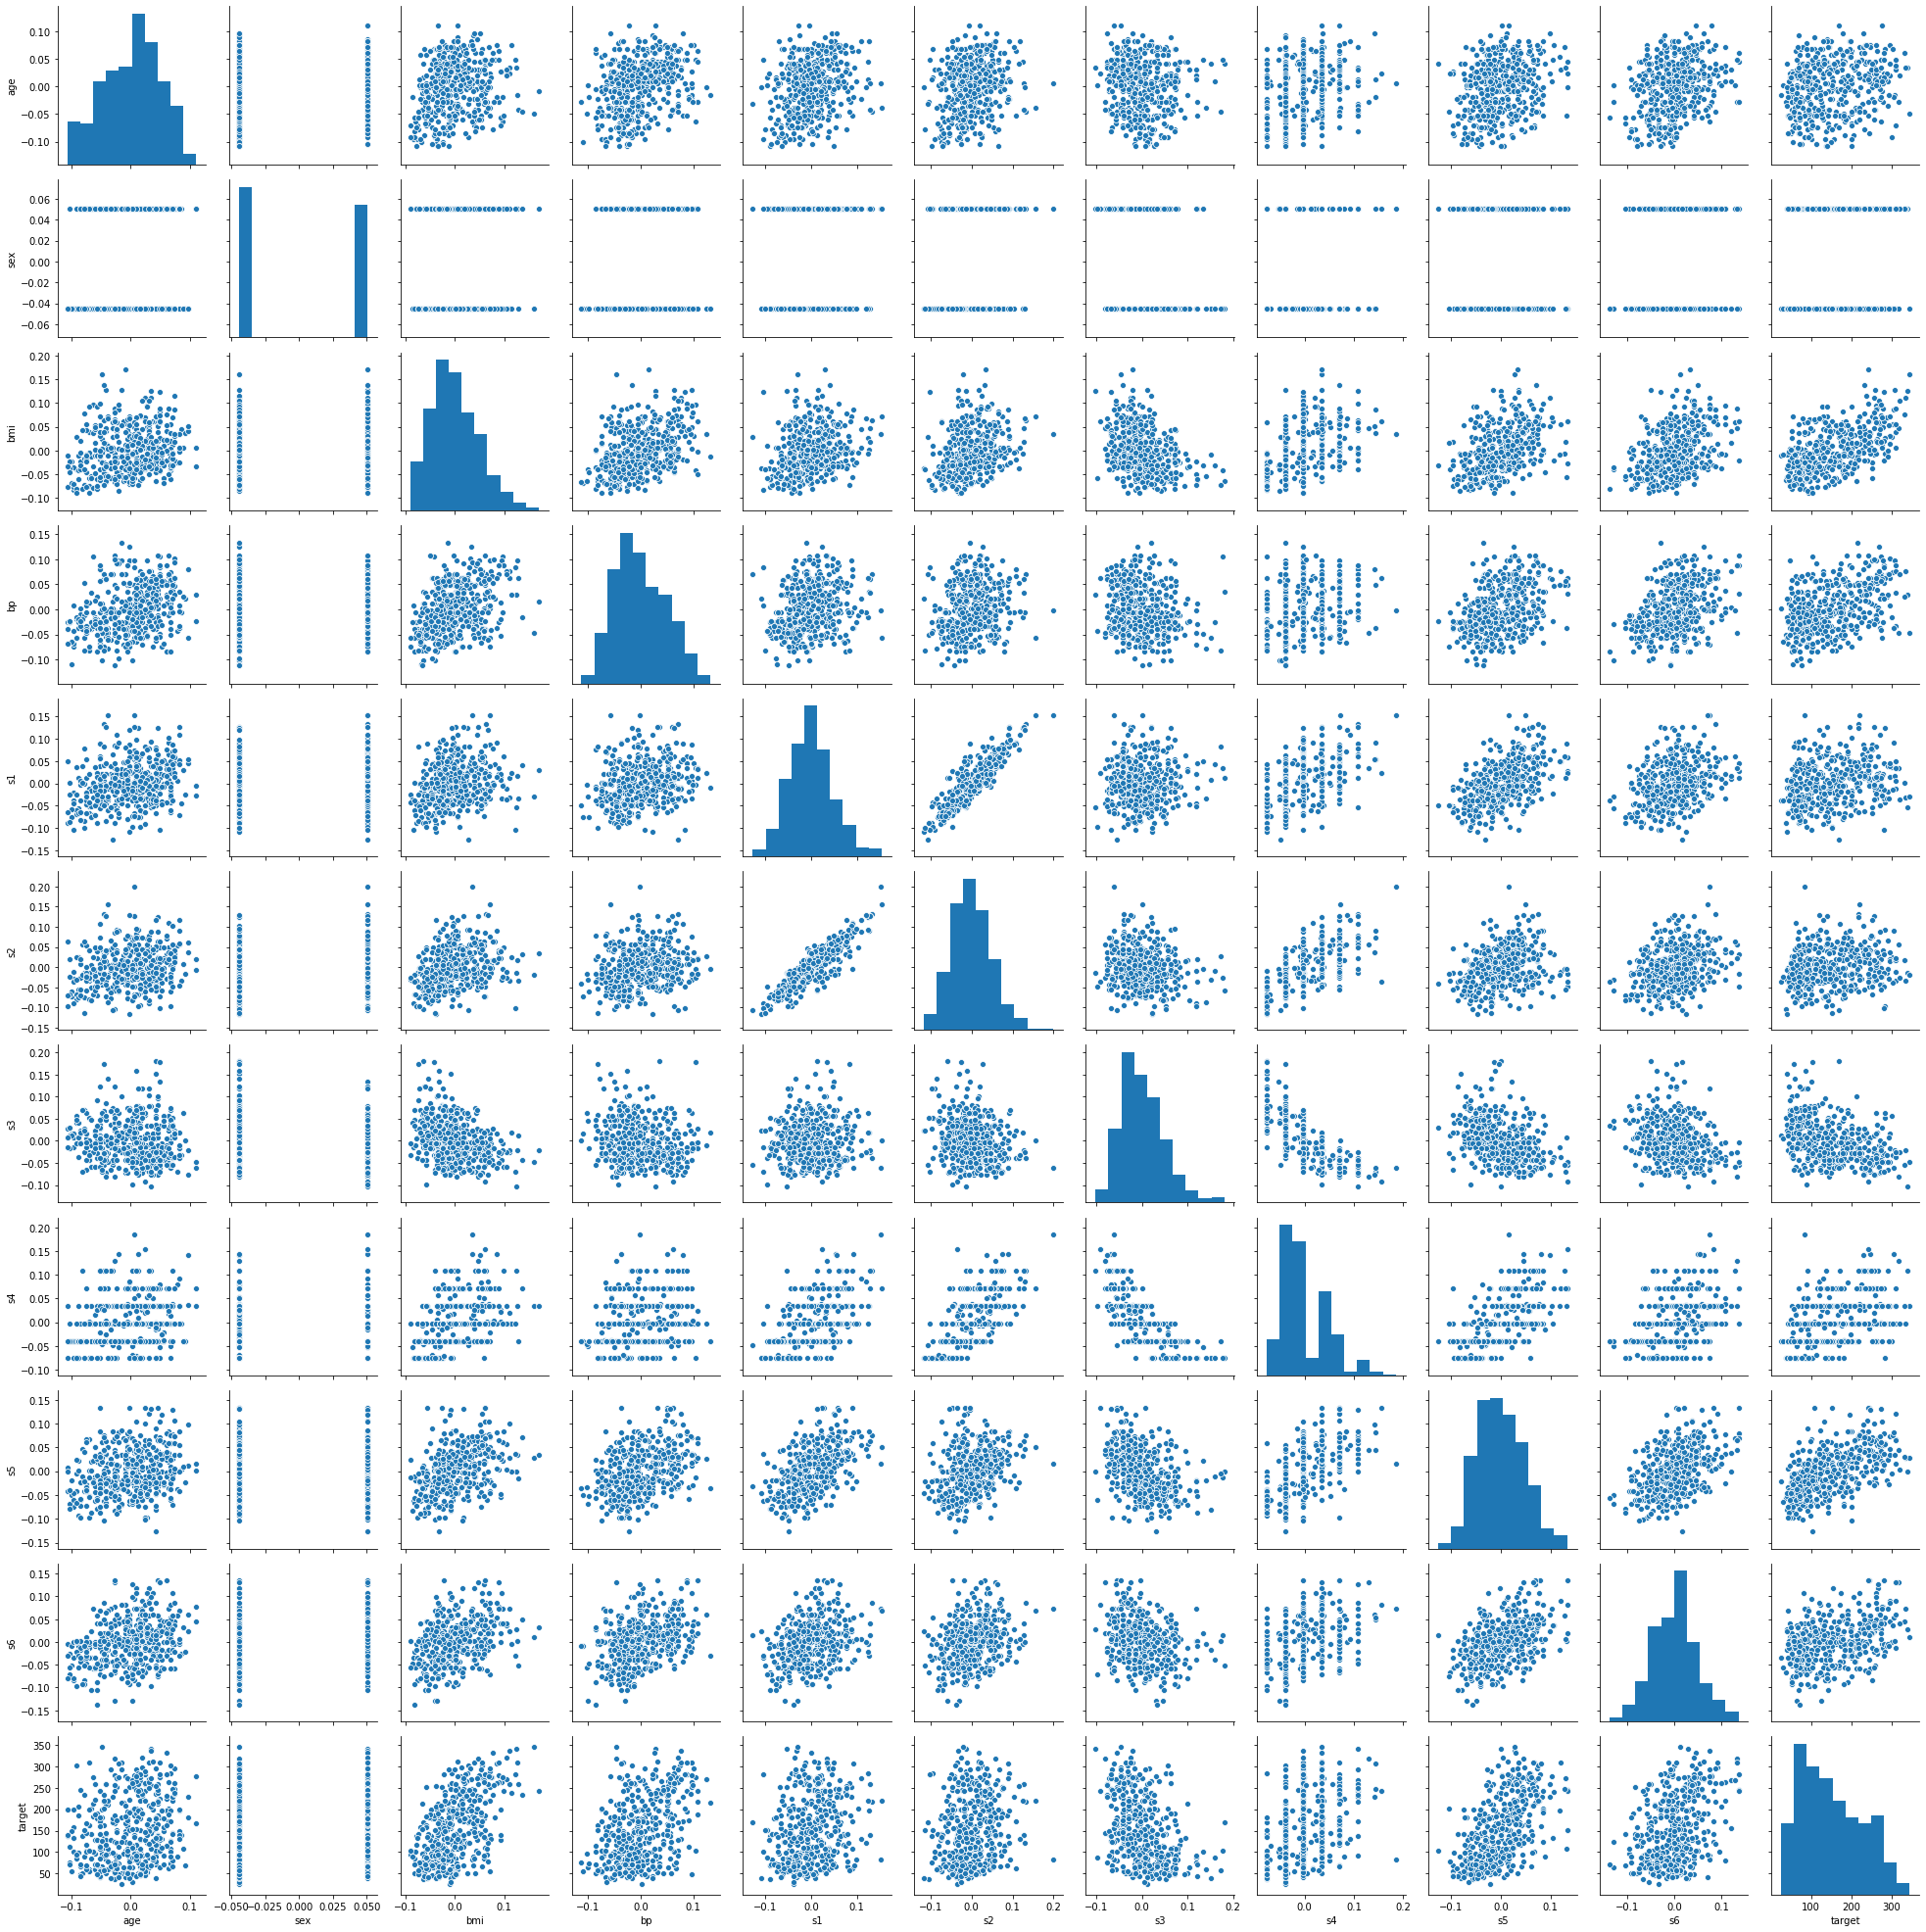

In [3]:
data = load_diabetes()
feature = pd.DataFrame(data['data'],columns=data['feature_names'])
target = pd.DataFrame(data['target'],columns=['target'])
df_ = pd.concat([feature,target],axis=1)
cols = ['age', 'sex', 'bmi','bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

sns.pairplot(df_[cols])
plt.tight_layout()
plt.savefig('scatterplot.png',dpi=300)
plt.show()

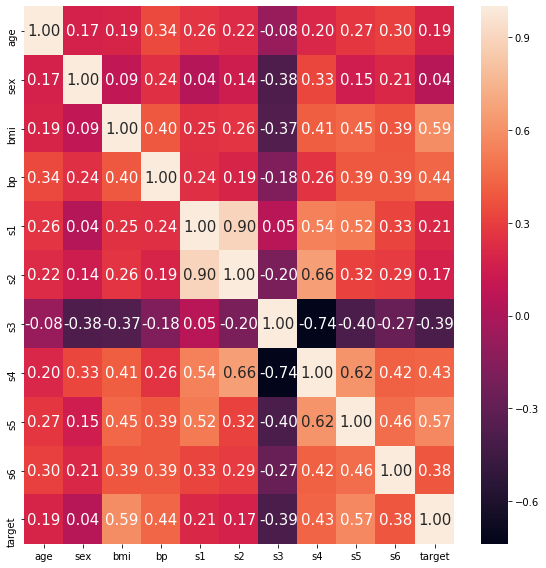

In [4]:
cm = np.corrcoef(df_[cols].values.T)

plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols,
                )

plt.tight_layout()
plt.savefig('correlation.png', dpi = 600)
plt.show()

## 原始參數

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.coef_)
y_pred = slr.predict(X_train)

print('MSE: %.3f' % (mean_squared_error(y_train, y_pred)))
print('R^2: %.3f' % (r2_score(y_train, y_pred)))

[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE: 2812.369
R^2: 0.530


In [546]:
y_pred = slr.predict(X_test)

print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R^2: %.3f' % (r2_score(y_test, y_pred)))

MSE: 3108.041
R^2: 0.459


## Preprocessing

In [20]:
#為求log,加0.15變成全部正數
X_train2 = X_train+0.15

df = pd.DataFrame(X_train2)

#血壓越高,糖尿病指數也容易越高因此取log2
df[3] = df[[3]].apply(lambda x : np.log2(x))

#發現取完後S1,S2,S4三者相關係數非常高並且導致S1最後係數變為負,
#有共線性發生,觀察後發現S4接近類別型資料並且數值與S2有較大的正相關,
#因此將S2/S4就可以有效的把S2的斜率降低使其更符合target的資料分布,提高與target的相關係數,
#並且用S1再減去除完的結果,可以有效的減低數值的大小並解決S1,S2的共線性
df[4] = df[4]-(df[5]/df[7])

#性別欄位幾乎無相關直接丟棄
df = df.drop(1,axis = 1)

df = df.drop(7,axis=1)
df = df.drop(5,axis=1)

X_train1 = df.values

In [21]:
#成功提高S1與target的相關係數
df['target'] = y_train
df.corr()

,0,2,3,4,6,8,9,target
0,1.000000,0.148035,0.299307,-0.038011,-0.035703,0.228721,0.299512,0.172709
2,0.148035,1.000000,0.380965,0.211660,-0.354475,0.455039,0.398350,0.595386
3,0.299307,0.380965,1.000000,0.093201,-0.170977,0.374622,0.376995,0.445179
4,-0.038011,0.211660,0.093201,1.000000,-0.726964,0.437884,0.184016,0.331425
6,-0.035703,-0.354475,-0.170977,-0.726964,1.000000,-0.402656,-0.288472,-0.376873
8,0.228721,0.455039,0.374622,0.437884,-0.402656,1.000000,0.511239,0.547734
9,0.299512,0.398350,0.376995,0.184016,-0.288472,0.511239,1.000000,0.397385
target,0.172709,0.595386,0.445179,0.331425,-0.376873,0.547734,0.397385,1.000000


In [22]:
slr = LinearRegression()
slr.fit(X_train1, y_train)
print(slr.coef_)
y_pred = slr.predict(X_train1)

print('MSE: %.3f' % (mean_squared_error(y_train, y_pred)))
print('R^2: %.3f' % (r2_score(y_train, y_pred)))

[  2.45989137 606.30548106  30.01204948  31.50888841 -63.1230144
 379.0738613   47.54444798]
MSE: 3041.048
R^2: 0.492


In [15]:
X_test2 = X_test+0.15
df = pd.DataFrame(X_test2)
df[3] = df[[3]].apply(lambda x : np.log2(x))
df[4] = df[4]-(df[5]/df[7])
df = df.drop(1,axis = 1)
df = df.drop(7,axis=1)
df = df.drop(5,axis=1)
X_test1 = df.values

In [16]:
y_pred = slr.predict(X_test1)

print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R^2: %.3f' % (r2_score(y_test, y_pred)))

MSE: 3016.647
R^2: 0.475


### 未處理時雖然有較好的結果但是由於存在共線性問題以及overfitting的問題,所以test的結果差蠻多的,但經過我們處理完共線性之後,雖然因為有刪除欄位的關係對整體資料的解釋力有下滑,但是測試準確率以及解釋力都有好的結果